<a href="https://colab.research.google.com/github/sahil-shankar110/CodeBySahil/blob/main/PCA_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

digit_recognizer_path = kagglehub.competition_download('digit-recognizer')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [ ]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [ ]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(42000, 785)

In [ ]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
3047,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt

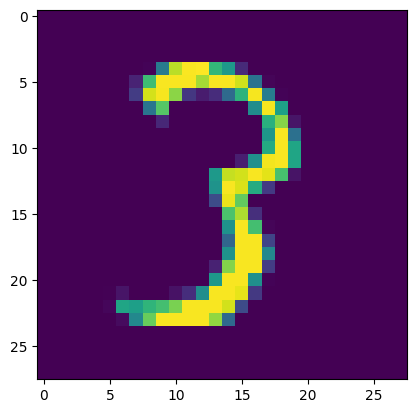

In [ ]:
plt.imshow(df.iloc[41730,1:].values.reshape(28,28))

In [ ]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state= 42)

In [ ]:
x_train.shape

(33600, 784)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# accuracy_score(y_test,y_pred)

0.9648809523809524

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 200)

In [ ]:
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test_trf)

In [ ]:
accuracy_score(y_test,y_pred)

0.9667857142857142

In [ ]:
# Transforming to a 2D Cordinate System
pca = PCA(n_components = 2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [ ]:
# Plot Graph
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x = x_train_trf[:,0],
                 y = x_train_trf[:,1],
                color = y_train_trf,
                color_discrete_sequence = px.colors.qualitative.G10)
fig.show()

In [ ]:
# Transforming to a 3D Cordinate System
pca = PCA(n_components = 3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [ ]:
# Plot Graph
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(x = x_train_trf[:,0],
                    y = x_train_trf[:,1],
                    z = x_train_trf[:,2],
                color = y_train_trf)
fig.update_layout(
    margin = dict(l=20,r=20,t=20,b=20)
)
fig.show()